In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading Dataset - Titanic

In [22]:
ins_data = pd.read_csv("insurance_data.csv")

X_train = pd.read_csv("train_X.csv")
Y_train = pd.read_csv("train_Y.csv")

X_test = pd.read_csv("test_X.csv")
Y_test = pd.read_csv("test_Y.csv")

In [23]:
X_train.head()

,Id,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,0
2,2,3,1,26.0,0,0,7.9250,1
3,3,1,1,35.0,1,0,53.1000,1
4,4,3,0,35.0,0,0,8.0500,1


In [24]:
ins_data.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [25]:
X_train = X_train.drop("Id", axis = 1)
Y_train = Y_train.drop("Id", axis = 1)
X_test = X_test.drop("Id", axis = 1)
Y_test = Y_test.drop("Id", axis = 1)

In [26]:
ins_data = np.array(ins_data)

#Convert the X_train, Y_train, X_test, Y_test into numpy
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [27]:
X_train = X_train.T
Y_train = Y_train.reshape(1, X_train.shape[1])

X_test = X_test.T
Y_test = Y_test.reshape(1, X_test.shape[1])

In [28]:
#Print the X_train, Y_train, X_test, Y_test into numpy
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

print("\nX_train:")
print(X_train)
print("Y_train:")
print(Y_train)
print("X_test:")
print(X_test)
print("Y_test:")
print(Y_test)

Shape of X_train:  (7, 891)
Shape of Y_train:  (1, 891)
Shape of X_test:  (7, 418)
Shape of Y_test:  (1, 418)

X_train:
[[ 3.      1.      3.     ...  3.      1.      3.    ]
 [ 0.      1.      1.     ...  1.      0.      0.    ]
 [22.     38.     26.     ... 20.     26.     32.    ]
 ...
 [ 0.      0.      0.     ...  2.      0.      0.    ]
 [ 7.25   71.2833  7.925  ... 23.45   30.      7.75  ]
 [ 1.      0.      1.     ...  1.      0.      2.    ]]
Y_train:
[[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0
  1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0
  0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1
  0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0
  0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
  0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1
  1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0
  0 0 0 1 1 1 1 1

# Logistic Regression Overview :

## Equations :

$ W = \begin{bmatrix}w_1 \\ w_2 \\ . \\ . \\ w_n \end{bmatrix}_{ n x 1}$ ......... initialize with zeros

$ B = single$  $weight/parameter $

$ X = \begin{bmatrix}. & . & .  \\ .  & . & .  \\ . & . & .  \\ . & . & .  \\ \end{bmatrix}_{n x m}$

$ Y = \begin{bmatrix}. & . & . & . & . \end{bmatrix}_{1 x m}$


$\sigma = \frac{1}{(1 + e^{-x})}  $   ......... (sigmoid function)


A = $\sigma ( W^T*X + b ) $    ........ (probabilistic predictions of shape (1 x m ) )

<img src = "sigmoid.png" width = 400px>


## Cost function :

$ cost = - \frac{1}{m} \sum_{i=1}^m [ y*log(a) + (1 - y)*log(1 - a) ] $

## Gradient Descent 

$dW = \frac{\partial COST }{\partial W} = ( A - Y )*X^T $ ...... shape (1 x n) 

$dB = \frac{\partial COST }{\partial B} = ( A - Y ) $

$W = W - \alpha * dW^T $

$B = B - \alpha * dB $


<img src = "gradient-descent.png" width = 300px>

# Model

In [29]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [30]:
def model(X, Y, learning_rate, iterations):
    m = X.shape[1]
    n = X.shape[0]
    
    W = np.zeros((n,1))
    B = 0

    cost_list = []
    
    for i in range(iterations):
        
        Z = np.dot(W.T, X) + B
        A = sigmoid(Z)
        
        # cost function
        
        cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
        
        # Gradient Descent

        dW = 1/m * np.dot(X, (A - Y).T)
        dB = 1/m * np.sum(A - Y)

        W = W - learning_rate * dW
        B = B - learning_rate * dB
        
        # Keeping track of our cost function value
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
        
    return W, B, cost_list
        

In [31]:
iterations = 100000
learning_rate = 0.0015
W, B, cost_list = model(X_train, Y_train, learning_rate = learning_rate, iterations = iterations)

cost after  0 iteration is :  0.6931471805599454


cost after  10000 iteration is :  0.49652777693895306
cost after  20000 iteration is :  0.46674868550665993
cost after  30000 iteration is :  0.45687787762434423
cost after  40000 iteration is :  0.45288994293089646
cost after  50000 iteration is :  0.45093260252226425
cost after  60000 iteration is :  0.44977087490094686
cost after  70000 iteration is :  0.44896408292162787
cost after  80000 iteration is :  0.44834126966124827
cost after  90000 iteration is :  0.44783045246935776


### Cost vs Iteration
Plotting graph to see if Cost Function is decreasing or not

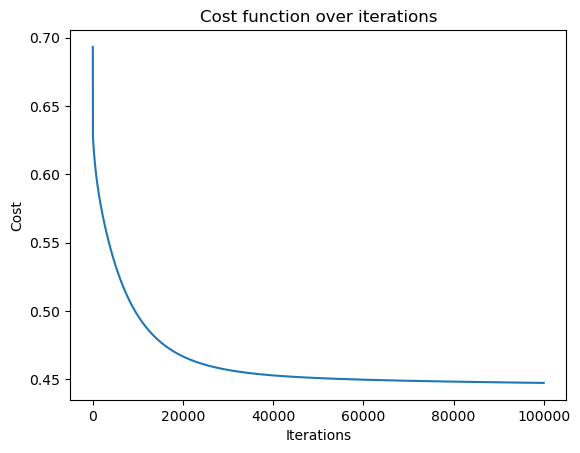

In [33]:
plt.plot(range(iterations), cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function over iterations')
plt.show()